In [1]:
import pandas as pd
dicionario = {'Notas':[10,7,3,5,2.7]}
df2 = pd.DataFrame(dicionario)

df2['Situação'] = df2['Notas'].apply(lambda x: 'Aprovado' if x>= 5 else ('Recuperação' if x>=3 and x<5 else 'Reprovado'))
df2['email'] = df2['Situação'].apply(lambda x: 'Mandar email' if x == 'Aprovado' else 'Não mandar')
aluno = {10:'Pedro',3.0:'Marcos',5.0:'João Paulo',2.7:'Marcela'}

df2['Aluno'] = df2['Notas'].map(aluno)
df2.head()

,Notas,Situação,email,Aluno
0,10.0,Aprovado,Mandar email,Pedro
1,7.0,Aprovado,Mandar email,NaN
2,3.0,Recuperação,Não mandar,Marcos
3,5.0,Aprovado,Mandar email,João Paulo
4,2.7,Reprovado,Não mandar,Marcela


In [ ]:
'''

Olá.
Seja bem vindo a nossa primeira análise de dados. Aqui vamos tratar e interpretar os valores disponibilizados pelo setor de 
ESTÁGIOS da EEL (estagio@eel.usp.br) referentes as carreiras de estágios que os estudantes da graduação ingressaram nos 
últimos 6 anos (2017-2022).
--
Após o processo de obtenção de dados, vamos seguir o seguinte roteiro: 
1º Limpeza e aplicação de filtros
2º Organização e interpretação 
3º Visualização 
--
Assim, será possível encontrar respostar concretas para as seguintes perguntas: Quais são as empresas com maior quantidade
de estudantes da EEL? Qual o principal período de recrutamento? Onde estão localizadas as principais empresas que contratam 
os alunos da graduação? 
--
Assim, nosso principal objetivo será auxiliar os alunos através de conclusões numéricas encontradas a partir da análise de 
dados com Python.
--
- O projeto foi elaborado pelos alunos:
Pedro Garcez, Engenharia Física (pedroogarcez@usp.br)
João Silva, Engenharia de Produção (joaosilva19@usp.br)

'''

In [13]:
#Importando as bibliotecas responsáveis por:
#Análise e manipulação dos dados
import pandas as pd
#Operações matemáticas
import numpy as np
#Visualização e plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns


#Criando o dataframe
df = pd.read_csv('Bruto_estagio_eel.csv')
#Visualizando o dataframe através da função 'head'
df.head()

,Curso,Empresa,Data Início,Data Término
0,88101-Engenharia Industrial Química,3GEN CONSULTORIA EMPRESARIAL LTDA,23/03/2018,19/12/2018
1,88201-Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,20/07/2017,31/12/2017
2,88052-Engenharia Química,3M DO BRASIL LTDA,15/01/2018,31/12/2018
3,88052-Engenharia Química,3M DO BRASIL LTDA,15/02/2018,14/02/2019
4,88052-Engenharia Química,3M DO BRASIL LTDA,24/07/2017,23/07/2018


In [14]:
#Utilizando a função dropna para remover linhas que possuem qual valor vazio em uma de suas colunas.
df.dropna(axis=0,how='any')

,Curso,Empresa,Data Início,Data Término
0,88101-Engenharia Industrial Química,3GEN CONSULTORIA EMPRESARIAL LTDA,23/03/2018,19/12/2018
1,88201-Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,20/07/2017,31/12/2017
2,88052-Engenharia Química,3M DO BRASIL LTDA,15/01/2018,31/12/2018
3,88052-Engenharia Química,3M DO BRASIL LTDA,15/02/2018,14/02/2019
4,88052-Engenharia Química,3M DO BRASIL LTDA,24/07/2017,23/07/2018
...,...,...,...,...
3886,0-,YABORÃ INDÚSTRIA AERONÁUTICA S/A,01/04/2021,12/07/2021
3887,88052-Engenharia Química,YARA FERTILIZANTES S.A,10/03/2022,09/03/2023
3888,0-,ZALAZ INDÚSTRIA DE COMÉRCIO E BEBIDAS,01/03/2021,28/05/2021
3889,88152-Engenharia Bioquímica,ZALAZ INDÚSTRIA DE COMÉRCIO E BEBIDAS,08/06/2021,30/09/2021


In [15]:
#Identificando os valores presentes na coluna Curso do no DataFrame criado
df.head()

,Curso,Empresa,Data Início,Data Término
0,88101-Engenharia Industrial Química,3GEN CONSULTORIA EMPRESARIAL LTDA,23/03/2018,19/12/2018
1,88201-Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,20/07/2017,31/12/2017
2,88052-Engenharia Química,3M DO BRASIL LTDA,15/01/2018,31/12/2018
3,88052-Engenharia Química,3M DO BRASIL LTDA,15/02/2018,14/02/2019
4,88052-Engenharia Química,3M DO BRASIL LTDA,24/07/2017,23/07/2018


In [16]:
'''
Como vemos acima, nossa coluna 'Curso' apresenta valores repetidos e valores nulos. Para tratar esses dados, vamos remover 
os valores nulos que não nos interessam.

'''
#Localizando os valores repetidos com a função 'loc' e os removendo com a função 'drop'

zero = df.loc[(df['Curso'] == '0-')]
df.drop(zero.index,inplace = True)
df['Curso'].value_counts()

n1 = df.loc[(df['Curso'] == '18050-')]
df.drop(n1.index,inplace=True)

n2 = df.loc[(df['Curso'] == '59023-')]
df.drop(n2.index,inplace=True)

df['Curso'].value_counts()
df.head()

#Exportando arquivo
#nome_arquivo = 'estagio_compartilhado.xlsx'
#df.to_excel(nome_arquivo)
#print('DataFrame is written to Excel File successfully.')

,Curso,Empresa,Data Início,Data Término
0,88101-Engenharia Industrial Química,3GEN CONSULTORIA EMPRESARIAL LTDA,23/03/2018,19/12/2018
1,88201-Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,20/07/2017,31/12/2017
2,88052-Engenharia Química,3M DO BRASIL LTDA,15/01/2018,31/12/2018
3,88052-Engenharia Química,3M DO BRASIL LTDA,15/02/2018,14/02/2019
4,88052-Engenharia Química,3M DO BRASIL LTDA,24/07/2017,23/07/2018


In [17]:
'''
Após remover os valores inválidos, vamos agrupar os dados de Engenharia Química e Engenharia Industrial Química [1], pois
são o mesmo curso. Além disso, também vamos agrupar linhas de EQ com códigos diferentes [2]. O mesmo vai se aplicar para
os outros cursos que estão repetidos

Através da função anônima (lambda) será possível selecionar o curso de cada aluno estágiario sem modificar o conteúdo das 
das outras colunas. O processo também pode ser feito com outras funções, mas iremos utilizar a anônima para apresentação
da ferramenta.
'''

df['Curso filtrado'] = df['Curso'].apply(lambda x: x.split()[-1])
df['Curso filtrado'].value_counts()


Química       2088
Produção       518
Bioquímica     318
Materiais      315
Ambiental      283
Física         221
Name: Curso filtrado, dtype: int64

In [37]:
'''
Após todo processo de filtragem, agora vamos começar a interpretar nossos dados.

Primeira proposta:
- Identificar qual a porcentagem de alunos da EEL que estão estagiando em 2022. 
Para isso, será necessário primeiramente transformar nossa coluna data de início para o tipo 'datetime' [3]. Assim será
possível determinar a primera data do ano [4] e selecionar somente os alunos que começaram seu estágio em 2022 [5] através
da função 'loc' [5]
'''

#Transformando a data em datetime [3]
df['Data Início'] = pd.to_datetime(df['Data Início'])
df['Data Término'] = pd.to_datetime(df['Data Término'])

#Selecionando a primeira data do ano [4]
datainicio = '2022-01-01'
datatermino = '2022-12-31'

#estagiarios = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino)])
estagiarios = df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino)]
print(len(estagiarios))
#total_alunos = 1925

#porcentagem_estagiarios = (estagiarios/total_alunos)*100
#print(f'Em 2022 a EEL possui {estagiarios} estagiários.')
#print(f'Em 2022 a EEL possui {total_alunos} alunos.')
#print(f'{porcentagem_estagiarios} dos alunos da EEL estão estagiando em 2022.')

568


In [19]:
#Identificando os valores referentes a cada curso

#-- Engenharia Química
estagiarios_quimica = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino) & 
                             (df['Curso filtrado'] == 'Química')])
total_alunos_quimica = 941
porcentagem_estagiarios_quimica = (estagiarios_quimica/total_alunos_quimica)*100
print(f'{porcentagem_estagiarios_quimica}% dos alunos de EQ estão estagiando')

#-- Engenharia de Materiais
estagiarios_materiais = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino) & 
                             (df['Curso filtrado'] == 'Materiais')])
total_alunos_materiais = 167
porcentagem_estagiarios_materiais = (estagiarios_materiais/total_alunos_materiais)*100
print(f'{porcentagem_estagiarios_materiais}% dos alunos de EM estão estagiando')
      

#-- Engenharia Ambiental
estagiarios_ambiental = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino) & 
                             (df['Curso filtrado'] == 'Ambiental')])
total_alunos_ambiental = 190
porcentagem_estagiarios_ambiental = (estagiarios_ambiental/total_alunos_ambiental)*100
print(f'{porcentagem_estagiarios_ambiental}% dos alunos de EA estão estagiando')

#-- Engenharia Bioquímmica
estagiarios_bioquimica = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino) & 
                             (df['Curso filtrado'] == 'Bioquímica')])
total_alunos_bioquimica = 218
porcentagem_estagiarios_bioquimica = (estagiarios_bioquimica/total_alunos_bioquimica)*100
print(f'{porcentagem_estagiarios_bioquimica}% dos alunos de EB estão estagiando')

#-- Engenharia de Produção
estagiarios_producao = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino) & 
                             (df['Curso filtrado'] == 'Produção')])
total_alunos_producao = 225
porcentagem_estagiarios_producao = (estagiarios_producao/total_alunos_producao)*100
print(f'{porcentagem_estagiarios_producao}% dos alunos de EP estão estagiando')

#-- Engenharia Física
estagiarios_fisica = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino) & 
                             (df['Curso filtrado'] == 'Física')])
total_alunos_fisica = 184
porcentagem_estagiarios_fisica = (estagiarios_fisica/total_alunos_fisica)*100
print(f'{porcentagem_estagiarios_fisica}% dos alunos de EF estão estagiando')

31.668437832093517% dos alunos de EQ estão estagiando
28.143712574850298% dos alunos de EM estão estagiando
31.05263157894737% dos alunos de EA estão estagiando
21.100917431192663% dos alunos de EB estão estagiando
32.88888888888889% dos alunos de EP estão estagiando
23.91304347826087% dos alunos de EF estão estagiando


C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Porcentagem (%) de alunos estágiarios em 2022')

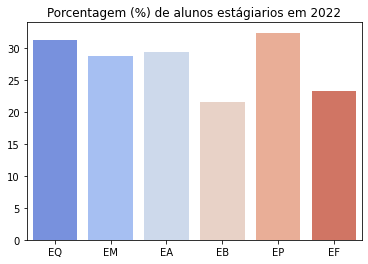

In [20]:
#Plotando o gráfico em relação aos valores acima
plt.figure()
curso = ['EQ','EM','EA','EB','EP','EF']
porcentagem = [31.3,28.7,29.4,21.5,32.4,23.3]
ax = sns.barplot(curso,porcentagem,palette = "coolwarm")
plt.title('Porcentagem (%) de alunos estágiarios em 2022')

In [21]:
'''
Agora, vamos direcionar nossos estudos para análise das empresas. Assim, será possível destacar as empresas que tem maior
número de alunos estagiários da EEL.
'''

'\nAgora, vamos direcionar nossos estudos para análise das empresas. Assim, será possível destacar as empresas que tem maior\nnúmero de alunos estagiários da EEL.\n'

In [22]:
'''
Antes de começar nossa análise, assim como foi feito para coluna cursos, também é necessário aplicar uma série de filtros
na coluna empresas. Como podemos observar, devido as diferentes formas de identificação no nome de cada empresa, existem 
repetições que podem atrapalhar nossos resultados. Um exemplo é a Suzano: 'SUZANO S.A','SUZANO PAPEL E CELULOSE S/A ' e 
'SUZANO S.A. '. Para isso, vamos utilizar um dicionário criado para que seja possível unificar todos os nomes contidos na 
coluna.
'''

"\nAntes de começar nossa análise, assim como foi feito para coluna cursos, também é necessário aplicar uma série de filtros\nna coluna empresas. Como podemos observar, devido as diferentes formas de identificação no nome de cada empresa, existem \nrepetições que podem atrapalhar nossos resultados. Um exemplo é a Suzano: 'SUZANO S.A','SUZANO PAPEL E CELULOSE S/A ' e \n'SUZANO S.A. '. Para isso, vamos utilizar um dicionário criado para que seja possível unificar todos os nomes contidos na \ncoluna.\n"

C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nº de alunos da EEL 2016-2022')

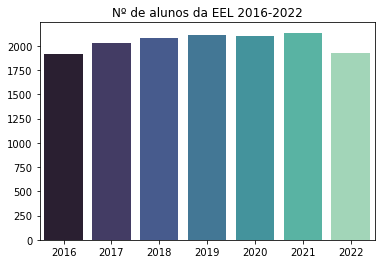

In [82]:
 #Agora vamos analisar a variação em relação a porcentagem de estagiários na EEL no intervalo de 2016 a 2022.
    #Porcentagem estagiarios = nº estagiários / nº total de alunos
#Primeiramente, vamos analisar quantos alunos a EEL possui.
plt.figure()
num_aluno = [1917,2027,2080,2111,2103,2135,1925]
ano = [2016,2017,2018,2019,2020,2021,2022]
ax = sns.barplot(ano,num_aluno,palette = "mako")
plt.title('Nº de alunos da EEL 2016-2022')

In [57]:
#Analisando o número de estagiários em cada ano
#-- 2016
datainicio2016 = '2016-01-01'
datatermino2016 = '2016-12-31'

estagiarios2016 = len(df.loc[(df['Data Início'] > datainicio2016) & (df['Data Início'] < datatermino2016)])
print(estagiarios2016) #= 299 estagiários

299


In [56]:
#-- 2017
datainicio2017 = '2017-01-01'
datatermino2017 = '2017-12-31'

estagiarios2017 = len(df.loc[(df['Data Início'] > datainicio2017) & (df['Data Início'] < datatermino2017)])
print(estagiarios2017) #= 497

497


In [58]:
#-- 2018 
datainicio2018 = '2018-01-01'
datatermino2018 = '2018-12-31'

estagiarios2018 = len(df.loc[(df['Data Início'] > datainicio2018) & (df['Data Início'] < datatermino2018)])
print(estagiarios2018) #= 551

551


In [60]:
#-- 2019
datainicio2019 = '2019-01-01'
datatermino2019 = '2019-12-31'

estagiarios2019 = len(df.loc[(df['Data Início'] > datainicio2019) & (df['Data Início'] < datatermino2019)])
print(estagiarios2019) #= 552

552


In [61]:
#-- 2020
datainicio2020 = '2020-01-01'
datatermino2020 = '2020-12-31'

estagiarios2020 = len(df.loc[(df['Data Início'] > datainicio2020) & (df['Data Início'] < datatermino2020)])
print(estagiarios2020) #= 426

426


In [63]:
#-- 2021
datainicio2021 = '2021-01-01'
datatermino2021 = '2021-12-31'

estagiarios2021 = len(df.loc[(df['Data Início'] > datainicio2021) & (df['Data Início'] < datatermino2021)])
print(estagiarios2021) #549

549


In [65]:
#-- 2022
datainicio = '2022-01-01'
datatermino = '2022-12-31'

#estagiarios = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino)])
estagiarios2020 = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino)])
print(estagiarios2020)

568


C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nº de estagiários na EEL 2016-2022')

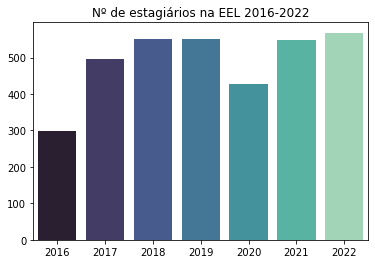

In [81]:
#Plotando o número de estágiarios por anos 
estagiarios = [299,497,551,552,426,549,568]
ax1 = sns.barplot(ano,estagiarios,palette = "mako")
plt.title('Nº de estagiários na EEL 2016-2022')

C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '(%)')

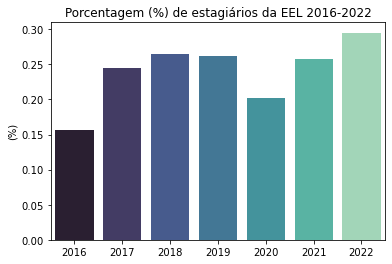

In [83]:
#Por último, analisando a porcentagem de estagiarios em cada ano
porcentagem = np.divide(estagiarios,num_aluno)
ax2 = sns.barplot(ano,porcentagem,palette = "mako")
plt.title('Porcentagem (%) de estagiários da EEL 2016-2022')
plt.ylabel('(%)')

C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\55129\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Porcentagem (%) de estagiários da EEL 2016-2022')

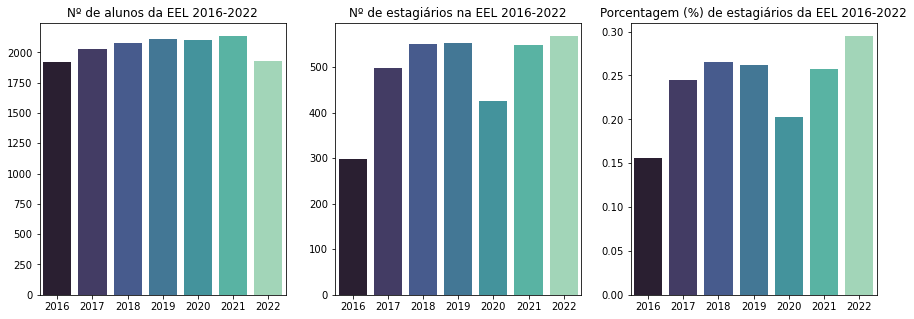

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.barplot(ano,num_aluno,palette = "mako")
plt.title('Nº de alunos da EEL 2016-2022')
plt.subplot(1,3,2)
ax1 = sns.barplot(ano,estagiarios,palette = "mako")
plt.title('Nº de estagiários na EEL 2016-2022')
plt.subplot(1,3,3)
ax2 = sns.barplot(ano,porcentagem,palette = "mako")
plt.title('Porcentagem (%) de estagiários da EEL 2016-2022')